In [71]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import datetime as dt
plt.style.use('ggplot')

In [72]:

pd.set_option('display.max_columns', 30)


In [73]:
# load the two csv files as dataframe
price_demand = pd.read_csv('price_demand_data.csv')
weather = pd.read_csv('weather_data.csv')

In [74]:
# do some basic data exploration to understand the two datasets
price_demand.shape


(11664, 4)

In [75]:
weather.shape

(243, 21)

In [76]:

price_demand.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
0,VIC1,1/01/2021 0:30,4179.21,LOW
1,VIC1,1/01/2021 1:00,4047.76,LOW
2,VIC1,1/01/2021 1:30,3934.70,LOW
3,VIC1,1/01/2021 2:00,3766.45,LOW
4,VIC1,1/01/2021 2:30,3590.37,LOW


In [77]:
price_demand.tail()


,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM
11663,VIC1,1/09/2021 0:00,4811.27,MEDIUM


In [78]:
weather.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,77.0,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,52.0,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,100.0,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,98.0,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,96.0,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3


In [79]:
weather.tail()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
238,27/08/2021,4.6,13.6,0.0,1.2,3.8,SSW,15.0,12:18,7.7,88.0,7,,Calm,1020.0,12.8,65,7.0,SSE,7,1017.4
239,28/08/2021,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,9.1,80.0,1,N,7,1018.6,17.4,31,3.0,NNW,24,1013.5
240,29/08/2021,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,10.6,79.0,7,N,13,1011.4,12.8,84,7.0,S,6,1010.4
241,30/08/2021,6.4,17.6,4.0,1.4,7.4,NNW,50.0,14:04,11.1,70.0,7,N,15,1016.1,16.8,45,1.0,NNW,28,1013.2
242,31/08/2021,11.0,20.1,0.0,5.8,3.6,N,61.0,16:29,13.5,53.0,7,N,17,NaN,19.4,43,6.0,N,30,1012.2


In [80]:
price_demand.describe()

,TOTALDEMAND
count,11664.000000
mean,4925.798454
std,876.407490
min,2708.530000
25%,4255.500000
50%,4803.755000
75%,5477.337500
max,8196.830000


In [81]:
weather.describe()

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm MSL pressure (hPa)
count,242.000000,242.000000,241.000000,243.000000,243.000000,240.000000,242.000000,242.000000,243.000000,241.000000,243.000000,243.000000,242.000000,242.000000
mean,11.050826,19.445868,1.576763,3.902469,5.349383,34.412500,13.720661,74.454545,5.164609,1017.740664,18.040329,56.930041,5.301653,1015.824793
std,3.870242,5.354085,4.498754,2.702141,3.604902,10.909319,4.306618,14.177593,2.562778,7.683402,4.963547,14.017376,2.392051,7.435859
min,1.700000,10.600000,0.000000,0.000000,0.000000,15.000000,3.000000,25.000000,0.000000,989.700000,8.600000,21.000000,0.000000,989.000000
25%,8.100000,15.500000,0.000000,1.900000,2.150000,28.000000,10.925000,65.000000,3.000000,1012.800000,14.400000,48.000000,3.000000,1011.000000
50%,10.900000,18.300000,0.000000,3.200000,4.900000,33.000000,13.400000,75.000000,7.000000,1018.100000,17.100000,56.000000,7.000000,1015.750000
75%,13.800000,21.800000,0.600000,5.600000,8.350000,41.000000,16.400000,84.000000,7.000000,1023.700000,20.150000,66.000000,7.000000,1021.600000
max,22.200000,39.200000,43.200000,13.800000,13.100000,67.000000,30.900000,100.000000,8.000000,1034.200000,35.200000,98.000000,8.000000,1032.400000


In [82]:
price_demand.dtypes

REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
PRICECATEGORY      object
dtype: object

In [83]:
weather.dtypes

Date                                  object
Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Evaporation (mm)                     float64
Sunshine (hours)                     float64
Direction of maximum wind gust        object
Speed of maximum wind gust (km/h)    float64
Time of maximum wind gust             object
9am Temperature (°C)                 float64
9am relative humidity (%)            float64
9am cloud amount (oktas)               int64
9am wind direction                    object
9am wind speed (km/h)                 object
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)              int64
3pm cloud amount (oktas)             float64
3pm wind direction                    object
3pm wind speed (km/h)                 object
3pm MSL pressure (hPa)               float64
dtype: object

In [84]:
#further understand the price_demand dataset
price_demand['REGION'].value_counts()

VIC1    11664
Name: REGION, dtype: int64

In [85]:
price_demand['PRICECATEGORY'].value_counts()

LOW        7570
MEDIUM     3061
HIGH        777
EXTREME     256
Name: PRICECATEGORY, dtype: int64

In [86]:
# split the SETTLEMENTDATE into two columns, one is for the date and the other is for the time
price_demand[['DATE','TIME']] = price_demand['SETTLEMENTDATE'].str.split(' ', expand=True)
price_demand.head()

#cast the new date column to datetime format
price_demand['DATE'] = pd.to_datetime(price_demand['DATE'], format='%d/%m/%Y')
date_counts = price_demand['DATE'].value_counts()

In [87]:
price_demand.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,DATE,TIME
0,VIC1,1/01/2021 0:30,4179.21,LOW,2021-01-01,0:30
1,VIC1,1/01/2021 1:00,4047.76,LOW,2021-01-01,1:00
2,VIC1,1/01/2021 1:30,3934.70,LOW,2021-01-01,1:30
3,VIC1,1/01/2021 2:00,3766.45,LOW,2021-01-01,2:00
4,VIC1,1/01/2021 2:30,3590.37,LOW,2021-01-01,2:30


In [88]:
# fiter to the dates with 48 records only(full records of every half an hour demand)

# Get the dates that have exactly 48 records
valid_dates = date_counts[date_counts == 48].index

# Filter the original dataframe to keep only the valid dates
filtered_price_demand = price_demand[price_demand['DATE'].isin(valid_dates)]

# Print the resulting dataframe
filtered_price_demand = filtered_price_demand[['DATE' ,'TIME', 'TOTALDEMAND', 'PRICECATEGORY']].copy()
filtered_price_demand
filtered_price_demand.dtypes


DATE             datetime64[ns]
TIME                     object
TOTALDEMAND             float64
PRICECATEGORY            object
dtype: object

In [89]:
# create 4 dummy variables to summarized the number of price categories in one day and group every 48 half an hour demands into a daily demand

# Group the data by date and sum the total demand
df_daily = filtered_price_demand.groupby("DATE")["TOTALDEMAND"].sum().reset_index()
# Group the data by date and price category, and count the occurrences of each price category
df_grouped = filtered_price_demand.groupby(["DATE", "PRICECATEGORY"])["PRICECATEGORY"].count().unstack().reset_index()
# Rename the columns to more meaningful names
df_grouped.columns = ["DATE", "NO OF LOW", "NO OF MEDIUM", "NO OF HIGH", "NO OF EXTREME"]
df_grouped = df_grouped.fillna(0)
# Merge the two dataframes on the DATE column
filtered_price_demand = pd.merge(df_daily, df_grouped, on="DATE")
filtered_price_demand.head()




,DATE,TOTALDEMAND,NO OF LOW,NO OF MEDIUM,NO OF HIGH,NO OF EXTREME
0,2021-01-02,197990.13,0.0,0.0,48.0,0.0
1,2021-01-03,188742.96,0.0,0.0,48.0,0.0
2,2021-01-04,199281.07,0.0,0.0,48.0,0.0
3,2021-01-05,207680.91,0.0,0.0,48.0,0.0
4,2021-01-06,201497.24,0.0,0.0,48.0,0.0


In [90]:
# create columns in the Demand dataset to capture the weekdays and seasons


filtered_price_demand["WEEKDAY"] = filtered_price_demand["DATE"].dt.weekday.apply(lambda x: 1 if x < 5 else 0)
filtered_price_demand["SEASON"] = filtered_price_demand["DATE"].dt.month.apply(lambda x: "Summer" if x in [1, 2, 12] else "Autumn" if x in [3, 4, 5] else "Winter" if x in [6, 7, 8] else "Spring")

# Convert the season columns to 1s and 0s
season_cols = ["Spring", "Summer", "Autumn", "Winter"]

filtered_price_demand['SEASON'].value_counts()
for col in season_cols:
    filtered_price_demand[col] = filtered_price_demand["SEASON"].apply(lambda x: 1 if x == col else 0)

filtered_price_demand.drop('SEASON',inplace=True,axis=1)
filtered_price_demand.head(10)


,DATE,TOTALDEMAND,NO OF LOW,NO OF MEDIUM,NO OF HIGH,NO OF EXTREME,WEEKDAY,Spring,Summer,Autumn,Winter
0,2021-01-02,197990.13,0.0,0.0,48.0,0.0,0,0,1,0,0
1,2021-01-03,188742.96,0.0,0.0,48.0,0.0,0,0,1,0,0
2,2021-01-04,199281.07,0.0,0.0,48.0,0.0,1,0,1,0,0
3,2021-01-05,207680.91,0.0,0.0,48.0,0.0,1,0,1,0,0
4,2021-01-06,201497.24,0.0,0.0,48.0,0.0,1,0,1,0,0
5,2021-01-07,201345.90,0.0,0.0,48.0,0.0,1,0,1,0,0
6,2021-01-08,207526.40,0.0,0.0,46.0,2.0,1,0,1,0,0
7,2021-01-09,212630.42,0.0,0.0,42.0,6.0,0,0,1,0,0
8,2021-01-10,230588.61,0.0,0.0,34.0,14.0,0,0,1,0,0
9,2021-01-11,290620.38,0.0,0.0,37.0,11.0,1,0,1,0,0


In [91]:
filtered_price_demand.tail()

,DATE,TOTALDEMAND,NO OF LOW,NO OF MEDIUM,NO OF HIGH,NO OF EXTREME,WEEKDAY,Spring,Summer,Autumn,Winter
237,2021-08-27,268490.26,1.0,5.0,9.0,33.0,1,0,0,0,1
238,2021-08-28,209104.93,0.0,0.0,19.0,29.0,0,0,0,0,1
239,2021-08-29,224449.35,2.0,3.0,19.0,24.0,0,0,0,0,1
240,2021-08-30,232158.40,0.0,1.0,26.0,21.0,1,0,0,0,1
241,2021-08-31,226540.29,0.0,0.0,31.0,17.0,1,0,0,0,1


In [92]:
weather.columns

Index(['Date', 'Minimum temperature (°C)', 'Maximum temperature (°C)',
       'Rainfall (mm)', 'Evaporation (mm)', 'Sunshine (hours)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       'Time of maximum wind gust', '9am Temperature (°C)',
       '9am relative humidity (%)', '9am cloud amount (oktas)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm Temperature (°C)', '3pm relative humidity (%)',
       '3pm cloud amount (oktas)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)'],
      dtype='object')

In [93]:
#remove the unwanted features, such as wind direction, and time of maximumm wind gust. Based on common sense, assume those features have no impact on the demand
weather_subset = weather[['Date', 'Minimum temperature (°C)', 'Maximum temperature (°C)',
       'Rainfall (mm)', 'Evaporation (mm)', 'Sunshine (hours)',
      #  'Direction of maximum wind gust ',
       'Speed of maximum wind gust (km/h)',
      #  'Time of maximum wind gust',
       '9am Temperature (°C)',
       '9am relative humidity (%)', '9am cloud amount (oktas)',
    #    '9am wind direction', 
      '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm Temperature (°C)', '3pm relative humidity (%)',
       '3pm cloud amount (oktas)',
      # '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)'
    ]].copy()

In [94]:
weather_subset.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,31.0,19.2,77.0,6,2,1018.8,28.1,43,5.0,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,30.0,23.3,52.0,7,17,1013.3,28.7,38,7.0,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,33.0,18.3,100.0,8,4,1007.7,23.5,59,4.0,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,41.0,16.2,98.0,8,11,1010.0,18.2,82,8.0,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,35.0,17.2,96.0,8,13,1012.5,18.2,82,8.0,19,1013.3


In [95]:
weather_subset['Date'] = pd.to_datetime(weather_subset['Date'], format='%d/%m/%Y')

weather_subset.dtypes

Date                                 datetime64[ns]
Minimum temperature (°C)                    float64
Maximum temperature (°C)                    float64
Rainfall (mm)                               float64
Evaporation (mm)                            float64
Sunshine (hours)                            float64
Speed of maximum wind gust (km/h)           float64
9am Temperature (°C)                        float64
9am relative humidity (%)                   float64
9am cloud amount (oktas)                      int64
9am wind speed (km/h)                        object
9am MSL pressure (hPa)                      float64
3pm Temperature (°C)                        float64
3pm relative humidity (%)                     int64
3pm cloud amount (oktas)                    float64
3pm wind speed (km/h)                        object
3pm MSL pressure (hPa)                      float64
dtype: object

In [96]:
mask = weather_subset.isna().any(axis=1)
row_with_na = weather_subset.loc[mask]
row_with_na

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind speed (km/h),3pm MSL pressure (hPa)
15,2021-01-16,11.0,20.1,2.6,6.8,3.7,NaN,15.7,66.0,7,13,1013.9,18.1,54,7.0,13,1014.1
149,2021-05-30,1.7,14.5,0.0,2.4,8.9,17.0,3.0,94.0,1,9,1031.5,14.1,48,NaN,4,NaN
187,2021-07-07,6.8,13.1,0.0,0.8,2.2,NaN,7.8,74.0,6,9,1026.0,12.0,49,7.0,6,1023.8
188,2021-07-08,NaN,NaN,NaN,1.8,8.3,NaN,NaN,NaN,2,NaN,NaN,12.0,55,6.0,9,1019.4
189,2021-07-09,2.0,12.0,NaN,1.0,9.0,15.0,4.6,92.0,4,4,1017.9,11.0,67,2.0,7,1015.7
242,2021-08-31,11.0,20.1,0.0,5.8,3.6,61.0,13.5,53.0,7,17,NaN,19.4,43,6.0,30,1012.2


In [97]:
weather_subset_updated = weather_subset
weather_subset_updated.head()
weather_subset_updated.set_index('Date',inplace=True)
weather_subset_updated.head()

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,
2021-01-01,15.6,29.9,0.0,2.8,9.3,31.0,19.2,77.0,6,2,1018.8,28.1,43,5.0,13,1015.3
2021-01-02,18.4,29.0,0.0,9.4,1.3,30.0,23.3,52.0,7,17,1013.3,28.7,38,7.0,4,1008.5
2021-01-03,17.0,26.2,12.6,4.8,7.1,33.0,18.3,100.0,8,4,1007.7,23.5,59,4.0,2,1005.2
2021-01-04,16.0,18.6,2.6,3.8,0.0,41.0,16.2,98.0,8,11,1010.0,18.2,82,8.0,17,1011.0
2021-01-05,15.9,19.1,11.2,1.0,0.0,35.0,17.2,96.0,8,13,1012.5,18.2,82,8.0,19,1013.3


In [98]:


# data cleansing. Assume the value of'Calm' as the columns of wind speed means no wind.Then replace it with zero
weather_subset_updated['3pm wind speed (km/h)'] = weather_subset_updated['3pm wind speed (km/h)'].replace('Calm', 0.0)
weather_subset_updated['9am wind speed (km/h)'] = weather_subset_updated['9am wind speed (km/h)'].replace('Calm', 0.0)
weather_subset_updated.dtypes

# weather_subset_updated.dtypes

Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Evaporation (mm)                     float64
Sunshine (hours)                     float64
Speed of maximum wind gust (km/h)    float64
9am Temperature (°C)                 float64
9am relative humidity (%)            float64
9am cloud amount (oktas)               int64
9am wind speed (km/h)                 object
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)              int64
3pm cloud amount (oktas)             float64
3pm wind speed (km/h)                 object
3pm MSL pressure (hPa)               float64
dtype: object

In [99]:
# weather_subset_updated.dtypes
weather_subset_updated['3pm wind speed (km/h)'] = weather_subset_updated['3pm wind speed (km/h)'].astype('float64')
weather_subset_updated['9am wind speed (km/h)'] = weather_subset_updated['9am wind speed (km/h)'].astype('float64')

In [100]:

# given there are only 6 rows containing missing value, we simply choose to drop them as a way to handle missing value
weather_subset_updated.dropna(inplace=True)


In [101]:
weather_subset_updated.isna().sum()

# there is only one row containing missing data. Now it can be safely dropped.

Minimum temperature (°C)             0
Maximum temperature (°C)             0
Rainfall (mm)                        0
Evaporation (mm)                     0
Sunshine (hours)                     0
Speed of maximum wind gust (km/h)    0
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am cloud amount (oktas)             0
9am wind speed (km/h)                0
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 0
3pm relative humidity (%)            0
3pm cloud amount (oktas)             0
3pm wind speed (km/h)                0
3pm MSL pressure (hPa)               0
dtype: int64

In [102]:
weather_subset_updated.shape

(237, 16)

In [103]:
weather_subset_updated = weather_subset_updated.reset_index()
weather_subset_updated.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,31.0,19.2,77.0,6,2.0,1018.8,28.1,43,5.0,13.0,1015.3
1,2021-01-02,18.4,29.0,0.0,9.4,1.3,30.0,23.3,52.0,7,17.0,1013.3,28.7,38,7.0,4.0,1008.5
2,2021-01-03,17.0,26.2,12.6,4.8,7.1,33.0,18.3,100.0,8,4.0,1007.7,23.5,59,4.0,2.0,1005.2
3,2021-01-04,16.0,18.6,2.6,3.8,0.0,41.0,16.2,98.0,8,11.0,1010.0,18.2,82,8.0,17.0,1011.0
4,2021-01-05,15.9,19.1,11.2,1.0,0.0,35.0,17.2,96.0,8,13.0,1012.5,18.2,82,8.0,19.0,1013.3


In [104]:
merged = pd.merge(filtered_price_demand, weather_subset_updated, left_on='DATE', right_on='Date', how='inner')
merged.columns

Index(['DATE', 'TOTALDEMAND', 'NO OF LOW', 'NO OF MEDIUM', 'NO OF HIGH',
       'NO OF EXTREME', 'WEEKDAY', 'Spring', 'Summer', 'Autumn', 'Winter',
       'Date', 'Minimum temperature (°C)', 'Maximum temperature (°C)',
       'Rainfall (mm)', 'Evaporation (mm)', 'Sunshine (hours)',
       'Speed of maximum wind gust (km/h)', '9am Temperature (°C)',
       '9am relative humidity (%)', '9am cloud amount (oktas)',
       '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm Temperature (°C)', '3pm relative humidity (%)',
       '3pm cloud amount (oktas)', '3pm wind speed (km/h)',
       '3pm MSL pressure (hPa)'],
      dtype='object')

In [105]:
merged.drop('Date', axis=1, inplace=True)


In [106]:
merged.head()

,DATE,TOTALDEMAND,NO OF LOW,NO OF MEDIUM,NO OF HIGH,NO OF EXTREME,WEEKDAY,Spring,Summer,Autumn,Winter,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2021-01-02,197990.13,0.0,0.0,48.0,0.0,0,0,1,0,0,18.4,29.0,0.0,9.4,1.3,30.0,23.3,52.0,7,17.0,1013.3,28.7,38,7.0,4.0,1008.5
1,2021-01-03,188742.96,0.0,0.0,48.0,0.0,0,0,1,0,0,17.0,26.2,12.6,4.8,7.1,33.0,18.3,100.0,8,4.0,1007.7,23.5,59,4.0,2.0,1005.2
2,2021-01-04,199281.07,0.0,0.0,48.0,0.0,1,0,1,0,0,16.0,18.6,2.6,3.8,0.0,41.0,16.2,98.0,8,11.0,1010.0,18.2,82,8.0,17.0,1011.0
3,2021-01-05,207680.91,0.0,0.0,48.0,0.0,1,0,1,0,0,15.9,19.1,11.2,1.0,0.0,35.0,17.2,96.0,8,13.0,1012.5,18.2,82,8.0,19.0,1013.3
4,2021-01-06,201497.24,0.0,0.0,48.0,0.0,1,0,1,0,0,13.7,19.2,1.2,1.0,3.2,35.0,15.2,72.0,7,11.0,1020.0,18.1,63,7.0,17.0,1020.0


In [107]:
# continue cleaning the dataset to ensure all the columns are named properly(capitalized the first letter)
merged.columns = merged.columns.str.title()
merged.columns

Index(['Date', 'Totaldemand', 'No Of Low', 'No Of Medium', 'No Of High',
       'No Of Extreme', 'Weekday', 'Spring', 'Summer', 'Autumn', 'Winter',
       'Minimum Temperature (°C)', 'Maximum Temperature (°C)', 'Rainfall (Mm)',
       'Evaporation (Mm)', 'Sunshine (Hours)',
       'Speed Of Maximum Wind Gust (Km/H)', '9Am Temperature (°C)',
       '9Am Relative Humidity (%)', '9Am Cloud Amount (Oktas)',
       '9Am Wind Speed (Km/H)', '9Am Msl Pressure (Hpa)',
       '3Pm Temperature (°C)', '3Pm Relative Humidity (%)',
       '3Pm Cloud Amount (Oktas)', '3Pm Wind Speed (Km/H)',
       '3Pm Msl Pressure (Hpa)'],
      dtype='object')

In [108]:
# continue cleaning the column names

merged.rename(columns={'Totaldemand': 'Total Demand'}, inplace=True)

merged.columns

Index(['Date', 'Total Demand', 'No Of Low', 'No Of Medium', 'No Of High',
       'No Of Extreme', 'Weekday', 'Spring', 'Summer', 'Autumn', 'Winter',
       'Minimum Temperature (°C)', 'Maximum Temperature (°C)', 'Rainfall (Mm)',
       'Evaporation (Mm)', 'Sunshine (Hours)',
       'Speed Of Maximum Wind Gust (Km/H)', '9Am Temperature (°C)',
       '9Am Relative Humidity (%)', '9Am Cloud Amount (Oktas)',
       '9Am Wind Speed (Km/H)', '9Am Msl Pressure (Hpa)',
       '3Pm Temperature (°C)', '3Pm Relative Humidity (%)',
       '3Pm Cloud Amount (Oktas)', '3Pm Wind Speed (Km/H)',
       '3Pm Msl Pressure (Hpa)'],
      dtype='object')

In [109]:
# merged.head()

In [110]:
#convert column of 'Date' to numeric values


merged['Month'] = merged['Date'].dt.month
merged['Day'] = merged['Date'].dt.day

merged['Month'] = merged['Month'].astype('category')
merged['Day'] = merged['Day'].astype('category')

merged.drop('Date', axis=1,inplace=True)

In [111]:
merged.dtypes

Total Demand                          float64
No Of Low                             float64
No Of Medium                          float64
No Of High                            float64
No Of Extreme                         float64
Weekday                                 int64
Spring                                  int64
Summer                                  int64
Autumn                                  int64
Winter                                  int64
Minimum Temperature (°C)              float64
Maximum Temperature (°C)              float64
Rainfall (Mm)                         float64
Evaporation (Mm)                      float64
Sunshine (Hours)                      float64
Speed Of Maximum Wind Gust (Km/H)     float64
9Am Temperature (°C)                  float64
9Am Relative Humidity (%)             float64
9Am Cloud Amount (Oktas)                int64
9Am Wind Speed (Km/H)                 float64
9Am Msl Pressure (Hpa)                float64
3Pm Temperature (°C)              

In [112]:
merged.shape

(236, 28)

<Figure size 2000x4000 with 0 Axes>

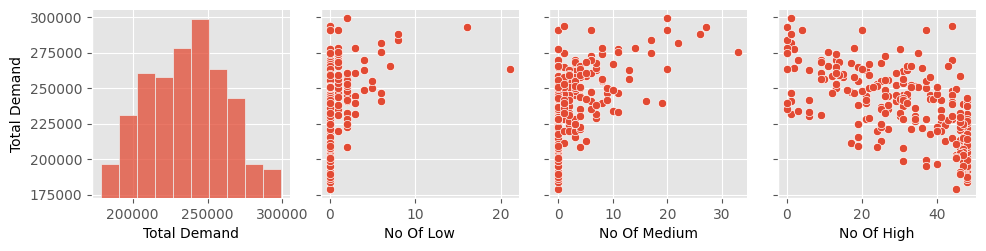

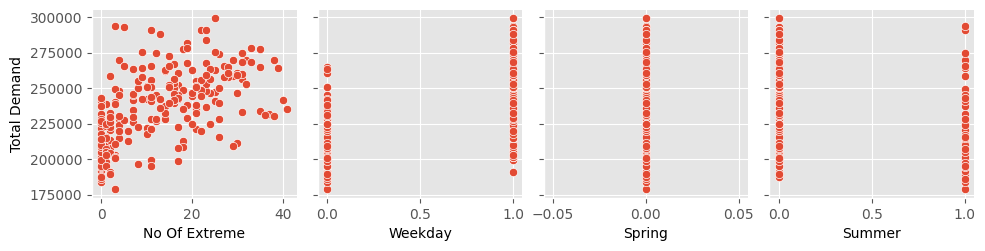

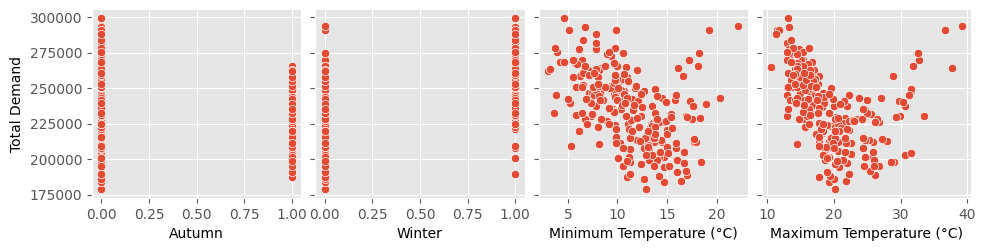

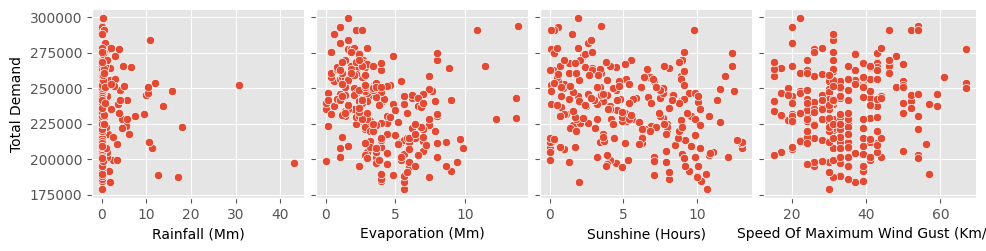

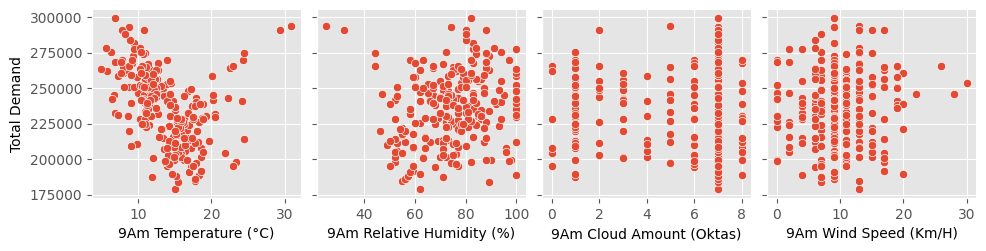

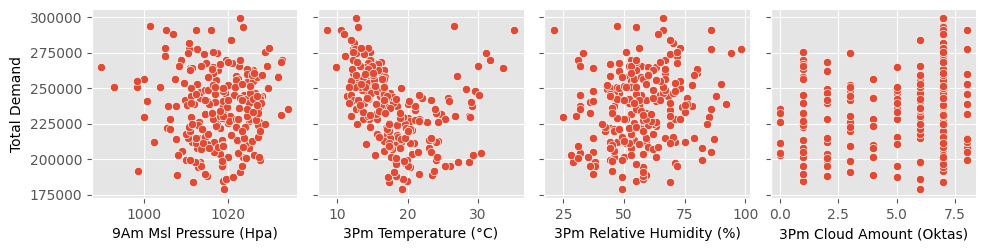

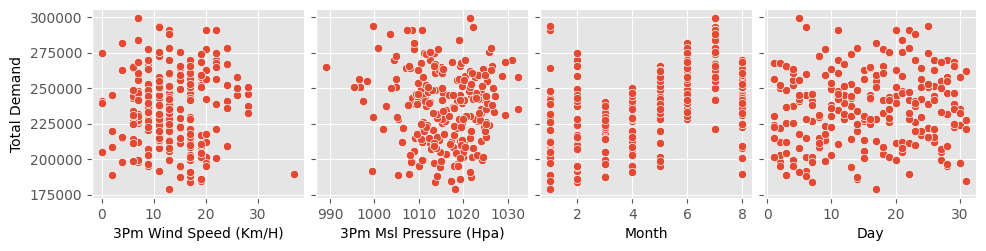

In [113]:
x_cols = merged.columns.to_list()

plt.figure(figsize=(20, 40))

sns.pairplot(merged, y_vars=['Total Demand'], x_vars=x_cols[:4])

sns.pairplot(merged, y_vars=['Total Demand'], x_vars=x_cols[4:8])

sns.pairplot(merged, y_vars=['Total Demand'], x_vars=x_cols[8:12])

sns.pairplot(merged, y_vars=['Total Demand'], x_vars=x_cols[12:16])

sns.pairplot(merged, y_vars=['Total Demand'], x_vars=x_cols[16:20])

sns.pairplot(merged, y_vars=['Total Demand'], x_vars=x_cols[20:24])

sns.pairplot(merged, y_vars=['Total Demand'], x_vars=x_cols[24:28])

plt.show()

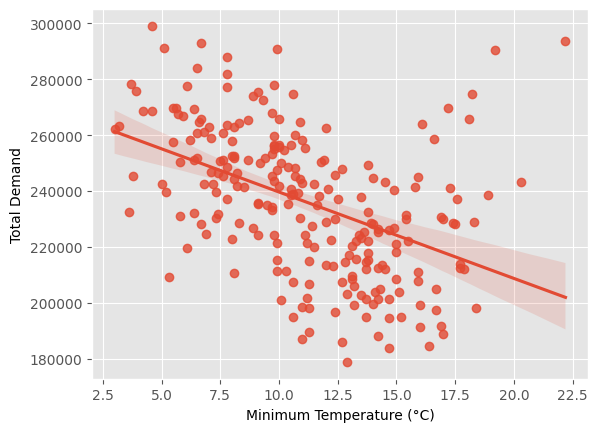

In [114]:

# create scatter plot with trend line
sns.regplot(data=merged, x="Minimum Temperature (°C)", y="Total Demand")

# display plot
plt.show()


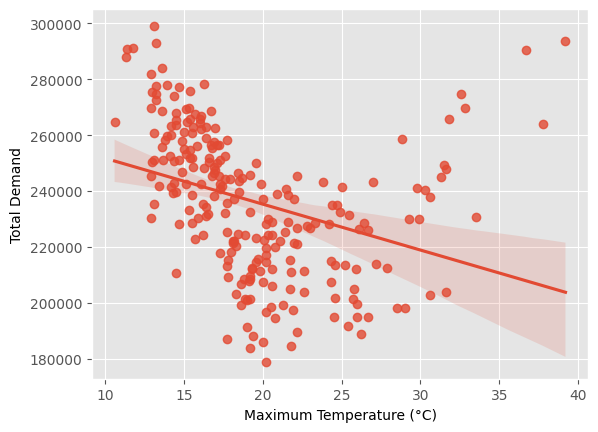

In [115]:

# create scatter plot with trend line
sns.regplot(data=merged, x="Maximum Temperature (°C)", y="Total Demand")

# display plot
plt.show()

In [116]:
merged.columns

Index(['Total Demand', 'No Of Low', 'No Of Medium', 'No Of High',
       'No Of Extreme', 'Weekday', 'Spring', 'Summer', 'Autumn', 'Winter',
       'Minimum Temperature (°C)', 'Maximum Temperature (°C)', 'Rainfall (Mm)',
       'Evaporation (Mm)', 'Sunshine (Hours)',
       'Speed Of Maximum Wind Gust (Km/H)', '9Am Temperature (°C)',
       '9Am Relative Humidity (%)', '9Am Cloud Amount (Oktas)',
       '9Am Wind Speed (Km/H)', '9Am Msl Pressure (Hpa)',
       '3Pm Temperature (°C)', '3Pm Relative Humidity (%)',
       '3Pm Cloud Amount (Oktas)', '3Pm Wind Speed (Km/H)',
       '3Pm Msl Pressure (Hpa)', 'Month', 'Day'],
      dtype='object')

/var/folders/97/cffb780x4172t1039y69_b700000gn/T/ipykernel_5156/3514860969.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged.corr()


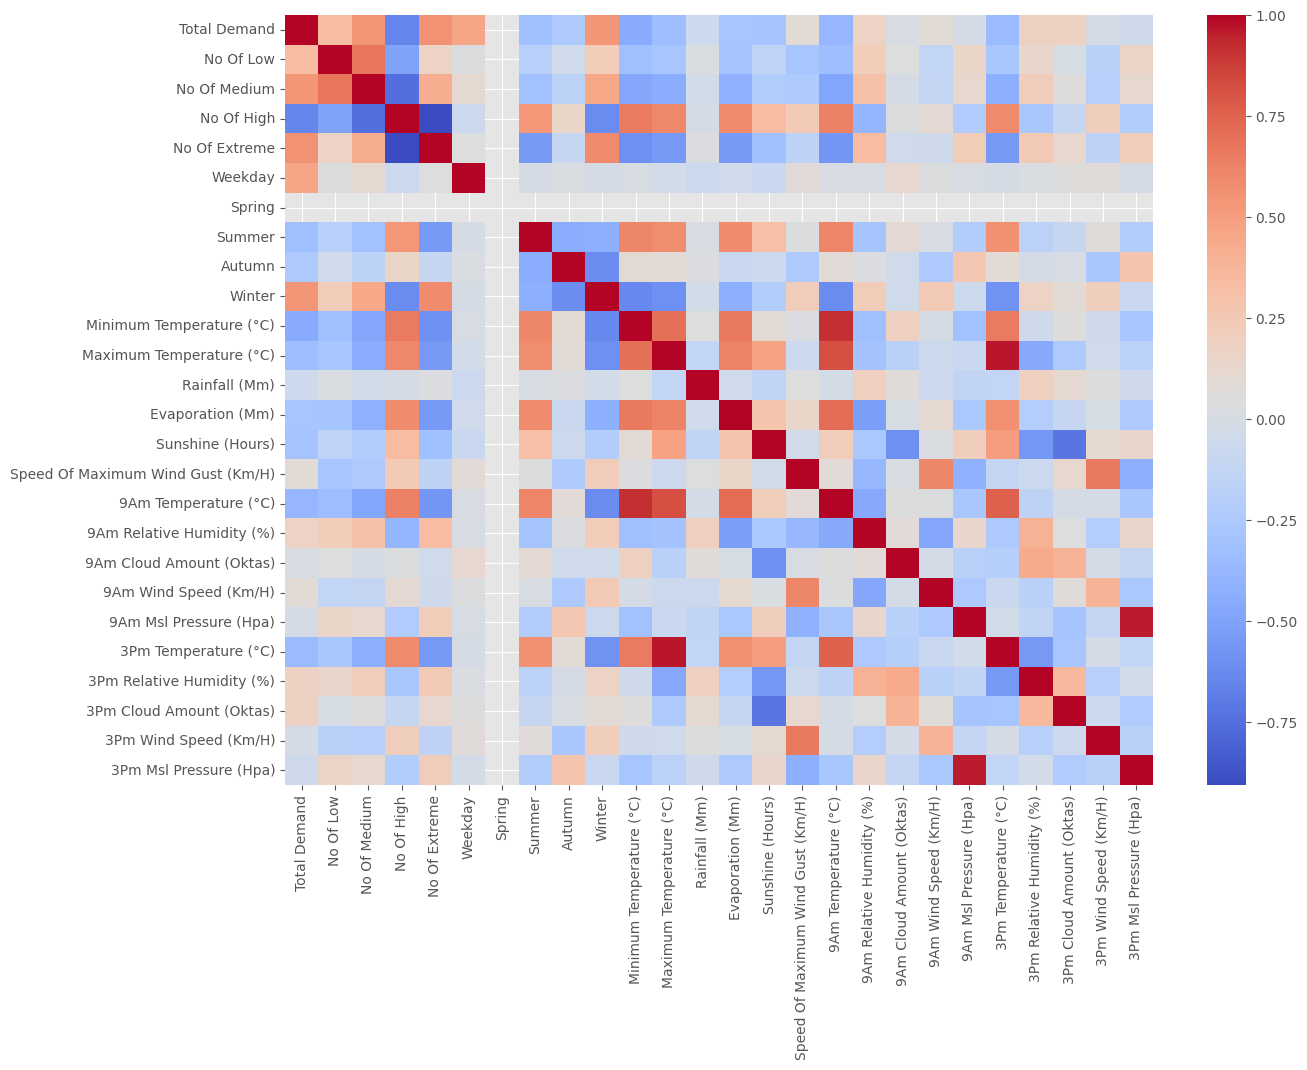

In [117]:
# calculate correlation matrix
corr_matrix = merged.corr()

plt.figure(figsize=(14, 10))

# plot heatmap of correlation matrix
sns.heatmap(corr_matrix,\
            #  annot=True, \
                cmap='coolwarm')

plt.show()

In [118]:
# Assume if the value of correlation is greater than 0.7 or less than -0.7, it indicts there are a strong correlation between the two columns

# create boolean mask for correlation values greater than 0.7 or less than -0.7
mask = (abs(corr_matrix) >= 0.7) & (corr_matrix != 1)

# subset correlation matrix using mask
high_corr_pairs = corr_matrix.mask(~mask)

# print pairs of features with high correlation
high_corr_pairs = high_corr_pairs.stack().reset_index().rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'})
high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', ascending=False)
print(high_corr_pairs.iloc[0:126])

# print(high_corr_pairs.stack().reset_index().rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'}))

                   Feature 1                 Feature 2  Correlation
8   Maximum Temperature (°C)      3Pm Temperature (°C)     0.967116
16      3Pm Temperature (°C)  Maximum Temperature (°C)     0.967116
19    3Pm Msl Pressure (Hpa)    9Am Msl Pressure (Hpa)     0.961269
15    9Am Msl Pressure (Hpa)    3Pm Msl Pressure (Hpa)     0.961269
5   Minimum Temperature (°C)      9Am Temperature (°C)     0.911242
11      9Am Temperature (°C)  Minimum Temperature (°C)     0.911242
7   Maximum Temperature (°C)      9Am Temperature (°C)     0.819253
12      9Am Temperature (°C)  Maximum Temperature (°C)     0.819253
17      3Pm Temperature (°C)      9Am Temperature (°C)     0.761569
14      9Am Temperature (°C)      3Pm Temperature (°C)     0.761569
9           Evaporation (Mm)      9Am Temperature (°C)     0.713508
13      9Am Temperature (°C)          Evaporation (Mm)     0.713508
4   Minimum Temperature (°C)  Maximum Temperature (°C)     0.701887
6   Maximum Temperature (°C)  Minimum Temperatur

In [119]:

import statsmodels.api as sm
# Get predictor and response variables
X = merged.drop("Total Demand", axis=1)
y = merged["Total Demand"]

# Fit initial linear regression model with all predictors using OLS
model = sm.OLS(y, sm.add_constant(X)).fit()

# Perform backward elimination to remove non-significant predictors
# while True:
#     pvalues = model.pvalues[1:]
#     if max(pvalues) > 0.05:
#         idx = np.argmax(pvalues)
#         X = X.drop(X.columns[idx], axis=1)
#         # Refit model with reduced set of predictors using OLS
#         model = sm.OLS(y, sm.add_constant(X)).fit()
#     else:
#         break

# Print final model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Total Demand   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     27.09
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           1.42e-51
Time:                        20:15:51   Log-Likelihood:                -2565.2
No. Observations:                 236   AIC:                             5180.
Df Residuals:                     211   BIC:                             5267.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [120]:
# Creating feature and target arrays based on the original dataset
X = merged.drop('Total Demand', axis=1).values
y = merged["Total Demand"].values

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
print(f'Linear Regression Score: {reg_all.score(X_test, y_test)}')


from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
mse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Squared Error is {mse}')
print(f'Mean Absoluate Error is {mae}')
print(f'Mean Absolute Percentage Erroris {mape}')




Linear Regression Score: 0.6408283477978681
Mean Squared Error is 14180.527050782934
Mean Absoluate Error is 10699.999864605905
Mean Absolute Percentage Erroris 0.045333350691873754


In [121]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)
print(f'Mean cross-validation score: {cv_results.mean()}')
print(f'Standard Deviation of cross-validation score: {cv_results.std()}')

Mean cross-validation score: 0.6429836000421134
Standard Deviation of cross-validation score: 0.09549096499956715


In [143]:
# remove the feature strongly correlated with other features
X_filtered = merged[['No Of Low', 'No Of Medium', 'No Of High',
       'Weekday', 'Summer', 'Autumn', 'Winter',
       'Minimum Temperature (°C)', 'Maximum Temperature (°C)', 'Rainfall (Mm)',
       'Evaporation (Mm)', 'Sunshine (Hours)',
       'Speed Of Maximum Wind Gust (Km/H)', 
       '9Am Relative Humidity (%)', '9Am Cloud Amount (Oktas)',
       '9Am Wind Speed (Km/H)', '9Am Msl Pressure (Hpa)',
        '3Pm Relative Humidity (%)',
       '3Pm Cloud Amount (Oktas)', '3Pm Wind Speed (Km/H)'
       , 'Month', 'Day']].values
y = merged["Total Demand"].values

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.3,random_state=42)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
print(f'Linear Regression Score: {reg_all.score(X_test, y_test)}')

mse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Squared Error is {mse}')
print(f'Mean Absoluate Error is {mae}')
print(f'Mean Absolute Percentage Erroris {mape}')

Linear Regression Score: 0.6307802126293447
Mean Squared Error is 14377.515033262298
Mean Absoluate Error is 10938.119848895973
Mean Absolute Percentage Erroris 0.04630857472902275


In [144]:
reg = LinearRegression()
cv_results = cross_val_score(reg, X_filtered, y, cv=kf)
print(f'Mean cross-validation score: {cv_results.mean()}')
print(f'Standard Deviation of cross-validation score: {cv_results.std()}')

Mean cross-validation score: 0.6457950023603262
Standard Deviation of cross-validation score: 0.1074449359289739


In [122]:
import numpy as np

merged["Min Temp Squared"] = merged["Minimum Temperature (°C)"].apply(lambda x: x**2)
merged["Max Temp Squared"] = merged["Maximum Temperature (°C)"].apply(lambda x: x**2)
merged["9am Temp Squared"] = merged["9Am Temperature (°C)"].apply(lambda x: x**2)
merged["3pm Temp Squared"] = merged["3Pm Temperature (°C)"].apply(lambda x: x**2)
merged["Sunshine Squared"] = merged["Sunshine (Hours)"].apply(lambda x: x**2)


merged["Min Temp Cubed"] = merged["Minimum Temperature (°C)"].apply(lambda x: x**3)
merged["Max Temp Cubed"] = merged["Maximum Temperature (°C)"].apply(lambda x: x**3)
merged["9am Temp Cubed"] = merged["9Am Temperature (°C)"].apply(lambda x: x**3)
merged["3pm Temp Cubed"] = merged["3Pm Temperature (°C)"].apply(lambda x: x**3)
merged["Sunshine Cubed"] = merged["Sunshine (Hours)"].apply(lambda x: x**3)



Create two customized columns to capture the interaction of Month vs Minumum temp and Month vs Max Temp as a way of data exploration and feature engineering

In [123]:
merged['Month *Min Temp'] = merged.apply(lambda row: row['Month'] * row["Minimum Temperature (°C)"], axis=1)

merged['Month *Max Temp'] = merged.apply(lambda row: row['Month'] * row["Maximum Temperature (°C)"], axis=1)

merged.tail()

,Total Demand,No Of Low,No Of Medium,No Of High,No Of Extreme,Weekday,Spring,Summer,Autumn,Winter,Minimum Temperature (°C),Maximum Temperature (°C),Rainfall (Mm),Evaporation (Mm),Sunshine (Hours),...,3Pm Msl Pressure (Hpa),Month,Day,Min Temp Squared,Max Temp Squared,9am Temp Squared,3pm Temp Squared,Sunshine Squared,Min Temp Cubed,Max Temp Cubed,9am Temp Cubed,3pm Temp Cubed,Sunshine Cubed,Month *Min Temp,Month *Max Temp
231,269865.57,4.0,6.0,9.0,29.0,1,0,0,0,1,5.5,12.9,1.2,2.4,1.0,...,1020.3,8,26,30.25,166.41,84.64,148.84,1.00,166.375,2146.689,778.688,1815.848,1.000,44.0,103.2
232,268490.26,1.0,5.0,9.0,33.0,1,0,0,0,1,4.6,13.6,0.0,1.2,3.8,...,1017.4,8,27,21.16,184.96,59.29,163.84,14.44,97.336,2515.456,456.533,2097.152,54.872,36.8,108.8
233,209104.93,0.0,0.0,19.0,29.0,0,0,0,0,1,5.3,17.8,0.0,1.6,9.6,...,1013.5,8,28,28.09,316.84,82.81,302.76,92.16,148.877,5639.752,753.571,5268.024,884.736,42.4,142.4
234,224449.35,2.0,3.0,19.0,24.0,0,0,0,0,1,9.1,16.2,0.6,6.4,4.3,...,1010.4,8,29,82.81,262.44,112.36,163.84,18.49,753.571,4251.528,1191.016,2097.152,79.507,72.8,129.6
235,232158.40,0.0,1.0,26.0,21.0,1,0,0,0,1,6.4,17.6,4.0,1.4,7.4,...,1013.2,8,30,40.96,309.76,123.21,282.24,54.76,262.144,5451.776,1367.631,4741.632,405.224,51.2,140.8


<Figure size 2000x4000 with 0 Axes>

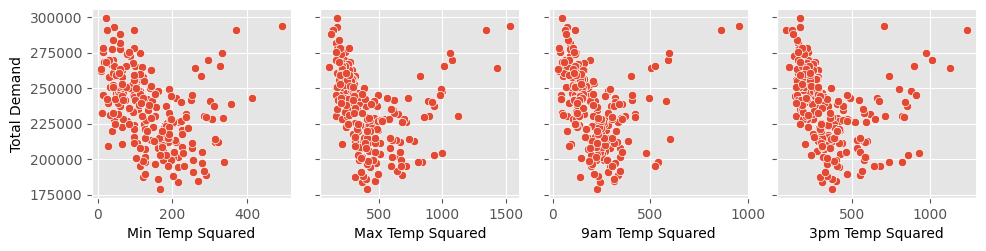

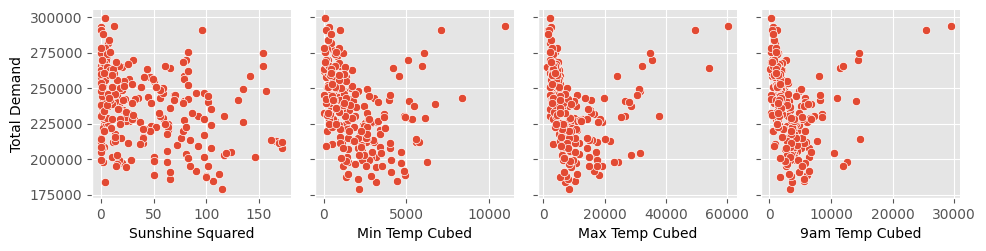

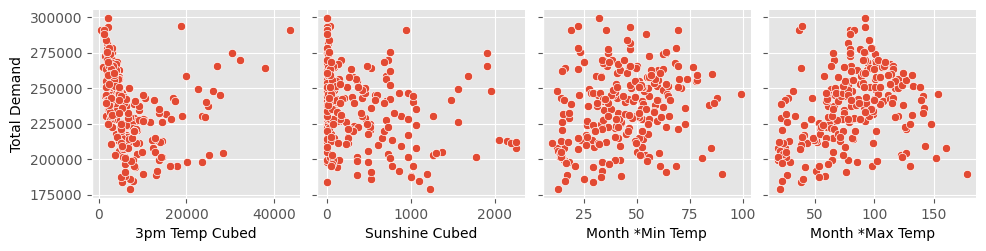

In [124]:
x_cols = merged.columns.to_list()

plt.figure(figsize=(20, 40))

sns.pairplot(merged, y_vars=['Total Demand'], x_vars=x_cols[28:32])

sns.pairplot(merged, y_vars=['Total Demand'], x_vars=x_cols[32:36])

sns.pairplot(merged, y_vars=['Total Demand'], x_vars=x_cols[36:40])

plt.show()

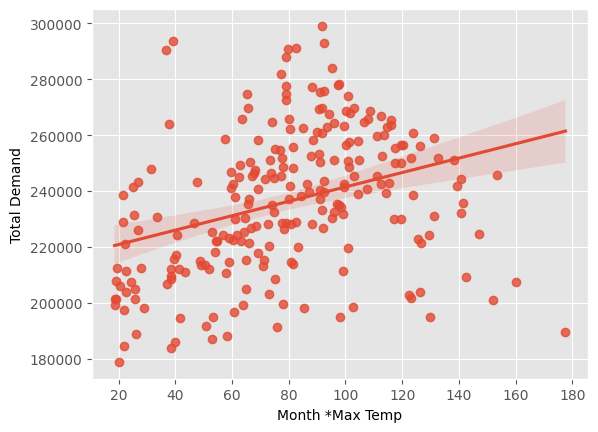

In [145]:

# create scatter plot with trend line
sns.regplot(data=merged, x="Month *Max Temp", y="Total Demand")

# display plot
plt.show()


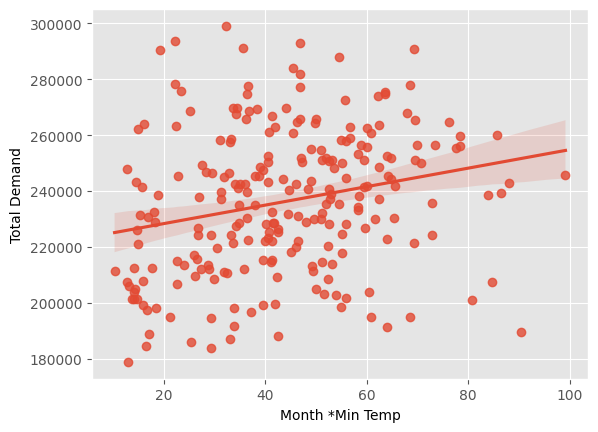

In [146]:
# create scatter plot with trend line
sns.regplot(data=merged, x="Month *Min Temp", y="Total Demand")

# display plot
plt.show()

In [157]:

# Get predictor and response variables
X = merged.drop("Total Demand", axis=1)
y = merged["Total Demand"]

# Fit initial linear regression model with all predictors using OLS
model = sm.OLS(y, sm.add_constant(X)).fit()

# Perform backward elimination to remove non-significant predictors
# while True:
#     pvalues = model.pvalues[1:]
#     if max(pvalues) > 0.05:
#         idx = np.argmax(pvalues)
#         X = X.drop(X.columns[idx], axis=1)
#         # Refit model with reduced set of predictors using OLS
#         model = sm.OLS(y, sm.add_constant(X)).fit()
#     else:
#         break

# Print final model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Total Demand   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     49.88
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           4.76e-81
Time:                        20:53:23   Log-Likelihood:                -2459.2
No. Observations:                 236   AIC:                             4992.
Df Residuals:                     199   BIC:                             5121.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [166]:
# Creating feature and target arrays
X = merged.drop("Total Demand", axis=1).values
y = merged["Total Demand"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [167]:

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
print(f'Feature Engineered Linear Regression Score: {reg_all.score(X_test, y_test)}')


mse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Squared Error is {mse}')
print(f'Mean Absoluate Error is {mae}')
print(f'Mean Absolute Percentage Erroris {mape}')

Feature Engineered Linear Regression Score: 0.8559905527295945
Mean Squared Error is 9252.365295232865
Mean Absoluate Error is 7300.286372778272
Mean Absolute Percentage Erroris 0.030507436237441038


In [168]:
# from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)
print(f'Mean cross-validation score: {cv_results.mean()}')
print(f'Standard deviation of cross-validation score: {cv_results.std()}')


Mean cross-validation score: 0.8252270653403228
Standard deviation of cross-validation score: 0.06551831564074811


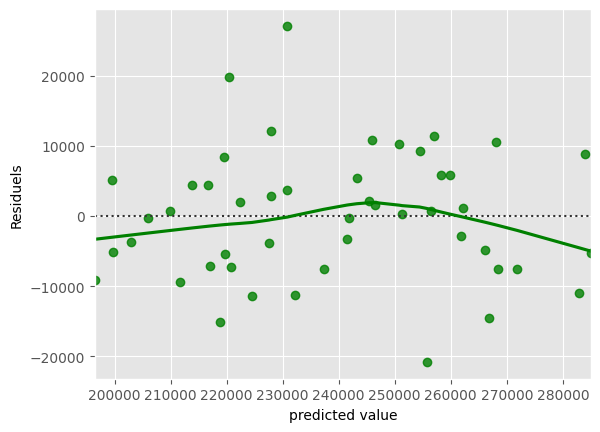

In [155]:
#calculate residuals
residuals = y_test - y_pred

sns.residplot(x=y_pred, y=residuals, lowess=True, color='g')
plt.xlabel('predicted value')
plt.ylabel('Residuels')

plt.show()


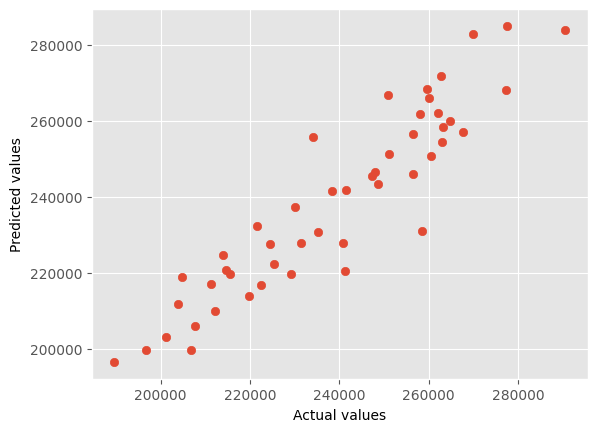

In [156]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [158]:
merged.columns

Index(['Total Demand', 'No Of Low', 'No Of Medium', 'No Of High',
       'No Of Extreme', 'Weekday', 'Spring', 'Summer', 'Autumn', 'Winter',
       'Minimum Temperature (°C)', 'Maximum Temperature (°C)', 'Rainfall (Mm)',
       'Evaporation (Mm)', 'Sunshine (Hours)',
       'Speed Of Maximum Wind Gust (Km/H)', '9Am Temperature (°C)',
       '9Am Relative Humidity (%)', '9Am Cloud Amount (Oktas)',
       '9Am Wind Speed (Km/H)', '9Am Msl Pressure (Hpa)',
       '3Pm Temperature (°C)', '3Pm Relative Humidity (%)',
       '3Pm Cloud Amount (Oktas)', '3Pm Wind Speed (Km/H)',
       '3Pm Msl Pressure (Hpa)', 'Month', 'Day', 'Min Temp Squared',
       'Max Temp Squared', '9am Temp Squared', '3pm Temp Squared',
       'Sunshine Squared', 'Min Temp Cubed', 'Max Temp Cubed',
       '9am Temp Cubed', '3pm Temp Cubed', 'Sunshine Cubed', 'Month *Min Temp',
       'Month *Max Temp'],
      dtype='object')

In [163]:
from sklearn.ensemble import RandomForestRegressor

# build the model based on the original features
X = merged[['No Of Low', 'No Of Medium', 'No Of High',
       'No Of Extreme', 'Weekday', 'Spring', 'Summer', 'Autumn', 'Winter',
       'Minimum Temperature (°C)', 'Maximum Temperature (°C)', 'Rainfall (Mm)',
       'Evaporation (Mm)', 'Sunshine (Hours)',
       'Speed Of Maximum Wind Gust (Km/H)', '9Am Temperature (°C)',
       '9Am Relative Humidity (%)', '9Am Cloud Amount (Oktas)',
       '9Am Wind Speed (Km/H)', '9Am Msl Pressure (Hpa)',
       '3Pm Temperature (°C)', '3Pm Relative Humidity (%)',
       '3Pm Cloud Amount (Oktas)', '3Pm Wind Speed (Km/H)',
       '3Pm Msl Pressure (Hpa)', 'Month', 'Day']].values
y = merged["Total Demand"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Create a Random Forest Regression model
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rfr.fit(X_train, y_train)

# Evaluate the model on the test data
rfr_score = rfr.score(X_test, y_test)
print("Random Forest Regression Score:", rfr_score)


rf_scores = cross_val_score(rfr, X, y, cv=kf)
print("Random Forest Regression mean cross-validation score:", rf_scores.mean())
print("Random Forest Regression Standard Deviation of cross-validation score:", rf_scores.std())

y_pred = rfr.predict(X_test)
mse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Squared Error is {mse}')
print(f'Mean Absoluate Error is {mae}')
print(f'Mean Absolute Percentage Erroris {mape}')




Random Forest Regression Score: 0.7775142097476
Random Forest Regression mean cross-validation score: 0.7836725909252494
Random Forest Regression Standard Deviation of cross-validation score: 0.10820630787392202
Mean Squared Error is 11500.280109973672
Mean Absoluate Error is 8658.946737499971
Mean Absolute Percentage Erroris 0.03639916931793418


In [164]:

from sklearn.tree import DecisionTreeRegressor


# build the model based on the original features
X = merged[['No Of Low', 'No Of Medium', 'No Of High',
       'No Of Extreme', 'Weekday', 'Spring', 'Summer', 'Autumn', 'Winter',
       'Minimum Temperature (°C)', 'Maximum Temperature (°C)', 'Rainfall (Mm)',
       'Evaporation (Mm)', 'Sunshine (Hours)',
       'Speed Of Maximum Wind Gust (Km/H)', '9Am Temperature (°C)',
       '9Am Relative Humidity (%)', '9Am Cloud Amount (Oktas)',
       '9Am Wind Speed (Km/H)', '9Am Msl Pressure (Hpa)',
       '3Pm Temperature (°C)', '3Pm Relative Humidity (%)',
       '3Pm Cloud Amount (Oktas)', '3Pm Wind Speed (Km/H)',
       '3Pm Msl Pressure (Hpa)', 'Month', 'Day']].values
y = merged["Total Demand"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Create a Random Forest Regression model
rfr = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
rfr.fit(X_train, y_train)

# Evaluate the model on the test data
rfr_score = rfr.score(X_test, y_test)
print("Decision Tree Regression Score:", rfr_score)


rf_scores = cross_val_score(rfr, X, y, cv=kf)
print("Decision Tree Regression mean cross-validation score:", rf_scores.mean())
print("Decision Tree Regression Standard Deviation of cross-validation score:", rf_scores.std())

y_pred = rfr.predict(X_test)
mse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Squared Error is {mse}')
print(f'Mean Absoluate Error is {mae}')
print(f'Mean Absolute Percentage Erroris {mape}')



Decision Tree Regression Score: 0.516129027798915
Decision Tree Regression mean cross-validation score: 0.4687257349701546
Decision Tree Regression Standard Deviation of cross-validation score: 0.24299332862306727
Mean Squared Error is 16959.852223734575
Mean Absoluate Error is 13371.052291666669
Mean Absolute Percentage Erroris 0.0567542460065997
